## Coconut Non-standard type Classification
Using Convolutional Neural Networks from Tensorflow<br><br>
Datasets: https://drive.google.com/file/d/1afo-w7HkAP4uWyCC8UT9oR9vcs_wx8jv/view

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.9.2


In [ ]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp drive/MyDrive/Dataset_kelapa.zip Dataset_kelapa.zip

In [ ]:
!unzip Dataset_kelapa.zip

Archive:  Dataset_kelapa.zip
   creating: Dataset_kelapa/KELAPA KECIL/
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111156.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111249.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111309.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111325.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111340.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111409.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111443.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111507.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111545.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111615.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111715.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111737.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_111815.jpg  
  inflating: Dataset_kelapa/KELAPA KECIL/IMG_20221022_1119

In [ ]:
from PIL import Image, ImageOps
import os

os.mkdir("Kelapa_resized")
for folder in os.listdir("Dataset_kelapa"):
  os.mkdir("Kelapa_resized/" + folder)

for folder in os.listdir("Dataset_kelapa"):
  for item in os.listdir("Dataset_kelapa" + "/" + folder):
    img = Image.open("Dataset_kelapa" + "/" + folder + "/" + item)
    img = img.resize((150, 150))
    img.save("Kelapa_resized/" + folder + "/" + item, 'JPEG')
    print("Image resized to:", "Kelapa_resized/" + folder + "/" + item)

Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_120317.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115608.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115555.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115842.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_114556.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115016.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115217.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115922.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_114735.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_120413.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_114814.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115711.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_114648.jpg
Image resized to: Kelapa_resized/KELAPA STANDAR/IMG_20221022_115

In [ ]:
# !zip -r Kelapa_resized.zip Kelapa_resized/

In [ ]:
# Set path train_dir dan val_dir
import os
coconut_dir = '/content'
train_dir = os.path.join(coconut_dir, 'Kelapa_resized')
val_dir = os.path.join(coconut_dir, 'Kelapa_resized')

In [ ]:
# Data Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    brightness_range=[0.3,1.5],
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    horizontal_flip = True,
                    fill_mode='nearest',
                    validation_split=0.2)

In [ ]:
# Data Generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=64,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=16,
        class_mode='categorical',
        subset='validation')

Found 240 images belonging to 6 classes.
Found 60 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       1

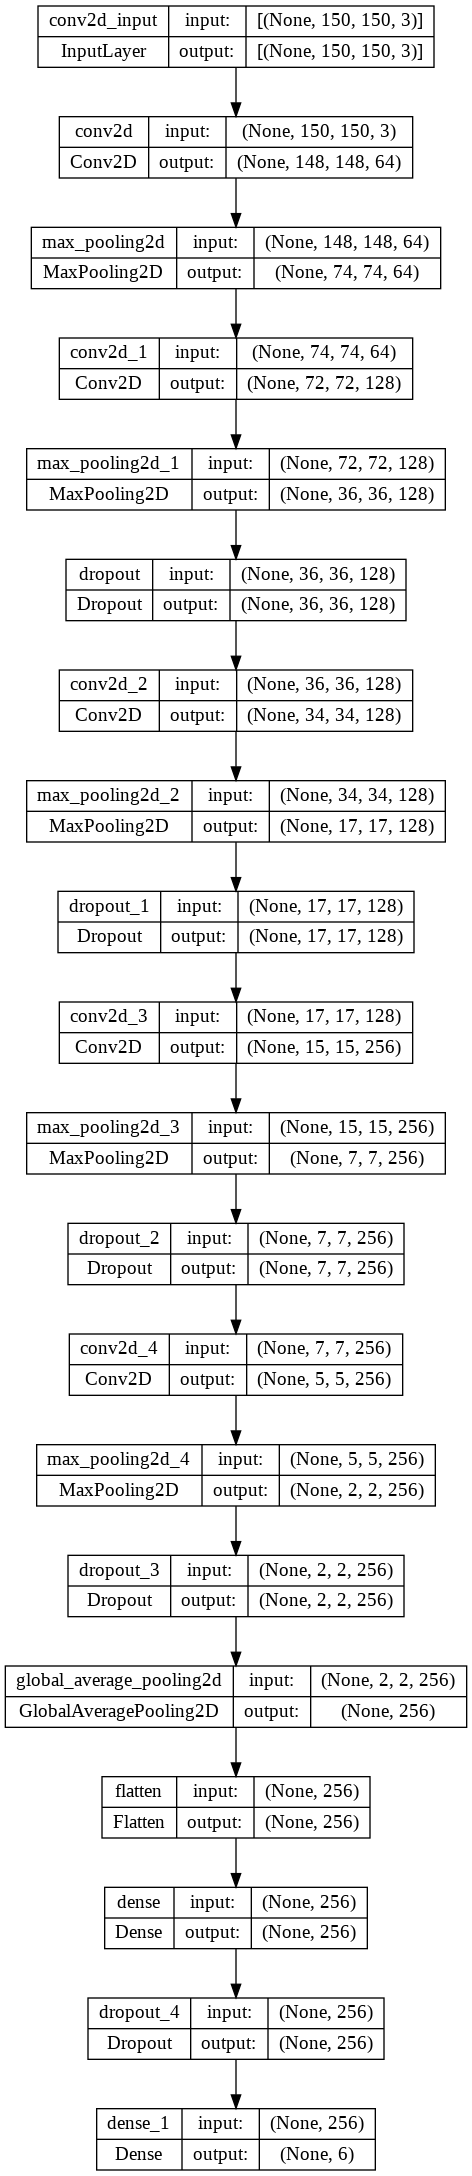

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy') >= 0.92):
      self.model.stop_training = True

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // 64,
      epochs = 300,
      validation_data = validation_generator,
      validation_steps = validation_generator.samples // 16,
      verbose = 1,
      callbacks=[myCallback()]
      )

Epoch 1/300
3/3 [==============================] - 15s 1s/step - loss: 1.8290 - accuracy: 0.2102 - val_loss: 1.7936 - val_accuracy: 0.1458
Epoch 2/300
3/3 [==============================] - 2s 737ms/step - loss: 1.7914 - accuracy: 0.1562 - val_loss: 1.7877 - val_accuracy: 0.2083
Epoch 3/300
3/3 [==============================] - 2s 730ms/step - loss: 1.7954 - accuracy: 0.1364 - val_loss: 1.7906 - val_accuracy: 0.2083
Epoch 4/300
3/3 [==============================] - 2s 740ms/step - loss: 1.7921 - accuracy: 0.1648 - val_loss: 1.7915 - val_accuracy: 0.2292
Epoch 5/300
3/3 [==============================] - 2s 734ms/step - loss: 1.7915 - accuracy: 0.1818 - val_loss: 1.7921 - val_accuracy: 0.1250
Epoch 6/300
3/3 [==============================] - 2s 724ms/step - loss: 1.7925 - accuracy: 0.1875 - val_loss: 1.7915 - val_accuracy: 0.1458
Epoch 7/300
3/3 [==============================] - 2s 807ms/step - loss: 1.7920 - accuracy: 0.1818 - val_loss: 1.7921 - val_accuracy: 0.1458
Epoch 8/300
3/3

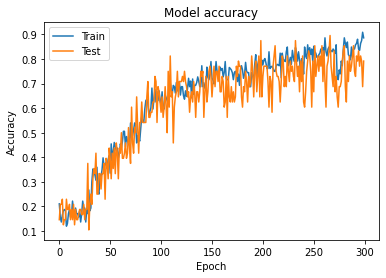

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

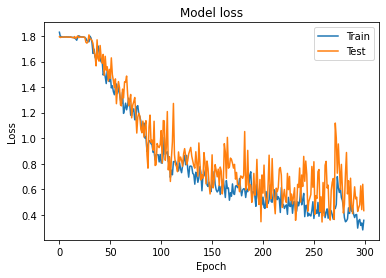

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"])
plt.show()

In [ ]:
model.save("coconut_augmented.h5")

Saving IMG_20221022_163725.jpg to IMG_20221022_163725.jpg
1/1 [==============================] - 0s 17ms/step
IMG_20221022_163725.jpg
[[0. 1. 0. 0. 0. 0.]]

 KELAPA PECAH BUSUK


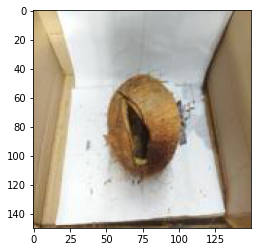

In [ ]:
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = img_to_array(img)
  img = np.expand_dims(x, axis=0)

  classes = model.predict(img)

  print(fn)
  print(np.round(classes))
  
  if classes[0][0] == 1:                    # Label: [[1, 0, 0, 0, 0, 0]]
     print("\n KELAPA KECIL")
  elif classes[0][1] == 1:                  # Label: [[0, 1, 0, 0, 0, 0]]
     print("\n KELAPA PECAH BUSUK")
  elif classes[0][2] == 1:                  # Label: [[0, 0, 1, 0, 0, 0]]
     print("\n KELAPA KELAPA STANDAR")
  elif classes[0][3] == 1:                  # Label: [[0, 0, 0, 1, 0, 0]]
     print("\n KELAPA TERLALU MUDA")
  elif classes[0][4] == 1:                  # Label: [[0, 0, 0, 0, 1, 0]]
     print("\n KELAPA TERLALU TUA")
  elif classes[0][5] == 1:                  # Label: [[0, 0, 0, 0, 0, 1]]
     print("\n KELAPA TUMBUH TUNAS")
  else :
    print("\n Gambar tidak dapat diklasifikasi")